## Import libraries

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix,\
        accuracy_score, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,GradientBoostingClassifier,StackingClassifier,ExtraTreesClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.naive_bayes import GaussianNB

from time import time
from datetime import timedelta

import seaborn as sns
from matplotlib import pyplot as plt

sns.set()


## Load dataset

In [ ]:
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/ML/Machine Learning Project. GALINDO - PAGLIA/kickafterpreprocess.csv', sep=";")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.columns

Index(['IsBadBuy', 'Auction', 'VehicleAge', 'SubModel', 'Color',
       'Transmission', 'WheelType', 'VehOdo', 'Nationality', 'Size', 'VNST',
       'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'season', 'age_cat',
       'VehOdo_cat', 'VehBCost_cat', 'WarrantyCost_cat'],
      dtype='object')

In [ ]:
df.head()

,IsBadBuy,Auction,VehicleAge,SubModel,Color,Transmission,WheelType,VehOdo,Nationality,Size,VNST,VehBCost,IsOnlineSale,WarrantyCost,season,age_cat,VehOdo_cat,VehBCost_cat,WarrantyCost_cat
0,0,ADESA,3,SEDAN,RED,AUTO,Alloy,89046,ASIAN,MEDIUM,EAST,7100.0,no,1113,winter,0to3_years,>82383,6710-7900,837-1155
1,0,ADESA,5,CAB,WHITE,AUTO,Alloy,93593,AMERICAN,TRUCK,EAST,7600.0,no,1053,winter,3to6_years,>82383,6710-7900,837-1155
2,0,ADESA,4,SEDAN,MAROON,AUTO,Covers,73807,AMERICAN,MEDIUM,EAST,4900.0,no,1389,winter,3to6_years,73322-82383,0-5440,1155-1623
3,0,ADESA,5,SEDAN,SILVER,AUTO,Alloy,65617,AMERICAN,COMPACT,EAST,4100.0,no,630,winter,3to6_years,61815-73322,0-5440,0-837
4,0,ADESA,4,COUPE,SILVER,MANUAL,Covers,69367,AMERICAN,COMPACT,EAST,4000.0,no,1020,winter,3to6_years,61815-73322,0-5440,837-1155


In [ ]:
df = df.drop('age_cat',axis=1)
df = df.drop('VehOdo_cat',axis=1)
df = df.drop('VehBCost_cat',axis=1)
df = df.drop('WarrantyCost_cat',axis=1)


df.head()


,IsBadBuy,Auction,VehicleAge,SubModel,Color,Transmission,WheelType,VehOdo,Nationality,Size,VNST,VehBCost,IsOnlineSale,WarrantyCost,season
0,0,ADESA,3,SEDAN,RED,AUTO,Alloy,89046,ASIAN,MEDIUM,EAST,7100.0,no,1113,winter
1,0,ADESA,5,CAB,WHITE,AUTO,Alloy,93593,AMERICAN,TRUCK,EAST,7600.0,no,1053,winter
2,0,ADESA,4,SEDAN,MAROON,AUTO,Covers,73807,AMERICAN,MEDIUM,EAST,4900.0,no,1389,winter
3,0,ADESA,5,SEDAN,SILVER,AUTO,Alloy,65617,AMERICAN,COMPACT,EAST,4100.0,no,630,winter
4,0,ADESA,4,COUPE,SILVER,MANUAL,Covers,69367,AMERICAN,COMPACT,EAST,4000.0,no,1020,winter


In [ ]:
from sklearn.model_selection import train_test_split
df = pd.get_dummies(df,drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()

dfnum = df[['VehicleAge','VehOdo','VehBCost','WarrantyCost']]
escalar.fit(dfnum)
dfnum2=escalar.transform(dfnum)
dfnum=pd.DataFrame(dfnum2)
dfnum.columns =['VehicleAge','VehOdo','VehBCost','WarrantyCost']

In [ ]:
df = pd.concat([df['IsBadBuy'],
                dfnum,
                df.iloc[:, 5:]
                ], axis='columns')
df.columns

Index(['IsBadBuy', 'VehicleAge', 'VehOdo', 'VehBCost', 'WarrantyCost',
       'Auction_MANHEIM', 'Auction_OTHER', 'SubModel_COUPE', 'SubModel_CUV',
       'SubModel_MINIVAN', 'SubModel_OTHER', 'SubModel_PASSENGER',
       'SubModel_SEDAN', 'SubModel_SPORT', 'SubModel_SUV', 'SubModel_WAGON',
       'Color_BLACK', 'Color_BLUE', 'Color_BROWN', 'Color_GOLD', 'Color_GREEN',
       'Color_GREY', 'Color_MAROON', 'Color_ORANGE', 'Color_OTHER',
       'Color_PURPLE', 'Color_RED', 'Color_SILVER', 'Color_WHITE',
       'Color_YELLOW', 'Transmission_MANUAL', 'WheelType_Covers',
       'WheelType_Special', 'Nationality_ASIAN', 'Nationality_OTHER',
       'Size_LARGE', 'Size_MEDIUM', 'Size_OTHER', 'Size_SUV', 'Size_TRUCK',
       'Size_VAN', 'VNST_EAST', 'VNST_WEST', 'IsOnlineSale_yes',
       'season_spring', 'season_summer', 'season_winter'],
      dtype='object')

In [ ]:
df

,IsBadBuy,VehicleAge,VehOdo,VehBCost,WarrantyCost,Auction_MANHEIM,Auction_OTHER,SubModel_COUPE,SubModel_CUV,SubModel_MINIVAN,...,Size_OTHER,Size_SUV,Size_TRUCK,Size_VAN,VNST_EAST,VNST_WEST,IsOnlineSale_yes,season_spring,season_summer,season_winter
0,0,-0.682127,1.206796,0.207540,-0.272237,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0.490058,1.518787,0.491178,-0.372706,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0,-0.096035,0.161175,-1.040468,0.189919,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0.490058,-0.400779,-1.494289,-1.081011,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,-0.096035,-0.143474,-1.551016,-0.427964,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69727,0,-0.682127,-0.228556,-1.437561,-0.101440,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
69728,0,1.662243,1.529148,-0.303008,0.129638,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
69729,0,-1.268220,0.202344,0.831544,-0.791326,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
69730,0,0.490058,0.761966,0.150813,-0.054555,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [ ]:
list(df.columns[1:])

['VehicleAge',
 'VehOdo',
 'VehBCost',
 'WarrantyCost',
 'Auction_MANHEIM',
 'Auction_OTHER',
 'SubModel_COUPE',
 'SubModel_CUV',
 'SubModel_MINIVAN',
 'SubModel_OTHER',
 'SubModel_PASSENGER',
 'SubModel_SEDAN',
 'SubModel_SPORT',
 'SubModel_SUV',
 'SubModel_WAGON',
 'Color_BLACK',
 'Color_BLUE',
 'Color_BROWN',
 'Color_GOLD',
 'Color_GREEN',
 'Color_GREY',
 'Color_MAROON',
 'Color_ORANGE',
 'Color_OTHER',
 'Color_PURPLE',
 'Color_RED',
 'Color_SILVER',
 'Color_WHITE',
 'Color_YELLOW',
 'Transmission_MANUAL',
 'WheelType_Covers',
 'WheelType_Special',
 'Nationality_ASIAN',
 'Nationality_OTHER',
 'Size_LARGE',
 'Size_MEDIUM',
 'Size_OTHER',
 'Size_SUV',
 'Size_TRUCK',
 'Size_VAN',
 'VNST_EAST',
 'VNST_WEST',
 'IsOnlineSale_yes',
 'season_spring',
 'season_summer',
 'season_winter']

In [ ]:
from sklearn.model_selection import train_test_split
y=df['IsBadBuy']
X=df.drop(columns='IsBadBuy')
X_learn, X_test, y_learn, y_test = train_test_split(X, y, test_size=0.20, random_state=2022)
X_train, X_val, y_train, y_val = train_test_split(X_learn, y_learn, test_size=0.20, random_state=2022)

# All models

In [ ]:
from sklearn import metrics
primary_eval_metric = metrics.f1_score
confusion_lbs = ['NotBadBuy', 'isABadBuy']

## Metrics

In [ ]:
import timeit
import pickle
import sys
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, \
                            precision_recall_curve, roc_curve, accuracy_score
from sklearn.exceptions import NotFittedError

In [ ]:
def confusion_plot(matrix, labels=None):
    """ Display binary confusion matrix as a Seaborn heatmap """
    
    labels = labels if labels else ['Negative (0)', 'Positive (1)']
    
    fig, ax = plt.subplots(nrows=1, ncols=1)
    sns.heatmap(data=matrix, cmap='Blues', annot=True, fmt='d',
                xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('PREDICTED')
    ax.set_ylabel('ACTUAL')
    ax.set_title('Confusion Matrix')
    plt.close()
    
    return fig

In [ ]:
def roc_plot(y_true, y_probs, label, compare=False, ax=None):
    """ Plot Receiver Operating Characteristic (ROC) curve 
        Set `compare=True` to use this function to compare classifiers. """
    
    fpr, tpr, thresh = roc_curve(y_true, y_probs, drop_intermediate=False)
    auc = round(roc_auc_score(y_true, y_probs), 2)
    
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1)
    label = ' '.join([label, f'({auc})']) if compare else None
    sns.lineplot(x=fpr, y=tpr, ax=axis,
                 estimator=None, label=label)
    
    if compare:
        axis.legend(title='Classifier (AUC)', loc='lower right')
    else:
        axis.text(0.72, 0.05, f'AUC = { auc }', fontsize=12,
                  bbox=dict(facecolor='green', alpha=0.4, pad=5))
            
        # Plot No-Info classifier
        axis.fill_between(fpr, fpr, tpr, alpha=0.3, edgecolor='g',
                          linestyle='--', linewidth=2)
        
    axis.set_xlim(0, 1)
    axis.set_ylim(0, 1)
    axis.set_title('ROC Curve')
    axis.set_xlabel('False Positive Rate [FPR]\n(1 - Specificity)')
    axis.set_ylabel('True Positive Rate [TPR]\n(Sensitivity or Recall)')
    
    plt.close()
    
    return axis if ax else fig

In [ ]:
def precision_recall_plot(y_true, y_probs, label, compare=False, ax=None):
    """ Plot Precision-Recall curve.
        Set `compare=True` to use this function to compare classifiers. """
    
    p, r, thresh = precision_recall_curve(y_true, y_probs)
    p, r, thresh = list(p), list(r), list(thresh)
    p.pop()
    r.pop()
    
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1)
    
    if compare:
        sns.lineplot(r, p, estimator=None,
                     ax=axis, label=label)
        axis.set_xlabel('Recall')
        axis.set_ylabel('Precision')
        axis.legend(loc='upper center')
    else:
        sns.lineplot(thresh, p, estimator=None,
                     label='Precision', ax=axis)
        axis.set_xlabel('Threshold')
        axis.set_ylabel('Precision')
        axis.legend(loc='upper center')

        axis_twin = axis.twinx()
        sns.lineplot(thresh, r, estimator=None,
                     color='limegreen', label='Recall', ax=axis_twin)
        axis_twin.set_ylabel('Recall')
        axis_twin.set_ylim(0, 1)
        axis_twin.legend(bbox_to_anchor=(0.24, 0.18))
    
    axis.set_xlim(0, 1)
    axis.set_ylim(0, 1)
    axis.set_title('Precision Vs Recall')
    
    plt.close()
    
    return axis if ax else fig

In [ ]:
def report(clf, x_train, y_train, x_test, y_test, display_scores=[],
           sample_weight=None, refit=False, importance_plot=False,
           confusion_labels=None, feature_labels=None, neural_net=False,
           verbose=True):
    """ Trains the passed classifier if not already trained and reports
        various metrics of the trained classifier """
    
    dump = dict()
    
    ## Train if not already trained
    clf, train_predictions, \
    train_acc, train_time = train_clf(clf, x_train, y_train,
                                      sample_weight=sample_weight,
                                      refit=refit)
    ## Testing
    start = timeit.default_timer()
    test_predictions = clf.predict(x_test)
    end = timeit.default_timer()
    test_time = end - start
    
    # For neural nets
    if neural_net:
        y_probs = np.copy(test_predictions)
        test_predictions = np.where(test_predictions.flatten() > 0.5, 1, 0)
    else:
        y_probs = clf.predict_proba(x_test)[:, 1]
    
    test_acc = accuracy_score(y_test, test_predictions)
    roc_auc = roc_auc_score(y_test, y_probs)
        
    ## Additional scores
    scores_dict = dict()
    for func in display_scores:
        scores_dict[func.__name__] = [func(y_train, train_predictions),
                                      func(y_test, test_predictions)]
        
    ## Model Memory
    model_mem = None
    if not neural_net:
        model_mem = round(model_memory_size(clf) / 1024, 2)
    
    print(clf)
    print("\n=============================> TRAIN-TEST DETAILS <======================================")
    
    ## Metrics
    print(f"Train Size: {x_train.shape[0]} samples")
    print(f" Test Size: {x_test.shape[0]} samples")
    print("---------------------------------------------")
    print(f"Training Time: {round(train_time, 3)} seconds")
    print(f" Testing Time: {round(test_time, 3)} seconds")
    print("---------------------------------------------")
    print("Train Accuracy: ", train_acc)
    print(" Test Accuracy: ", test_acc)
    print("---------------------------------------------")
    
    if display_scores:
        for k, v in scores_dict.items():
            score_name = ' '.join(map(lambda x: x.title(), k.split('_')))
            print(f'Train {score_name}: ', v[0])
            print(f' Test {score_name}: ', v[1])
            print()
        print("---------------------------------------------")
    
    print(" Area Under ROC (test): ", roc_auc)
    print("---------------------------------------------")
    print(f"Model Memory Size: {model_mem} kB")
    print("\n=============================> CLASSIFICATION REPORT <===================================")
    
    ## Classification Report
    clf_rep = classification_report(y_test, test_predictions, output_dict=True)
    
    print(classification_report(y_test, test_predictions,
                                target_names=confusion_labels))
    
    
    if verbose:
        print("\n================================> CONFUSION MATRIX <=====================================")
    
        ## Confusion Matrix HeatMap
        display(confusion_plot(confusion_matrix(y_test, test_predictions),
                               labels=confusion_labels))
        print("\n=======================================> PLOTS <=========================================")


        ## Variable importance plot
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
        roc_axes = axes[0, 0]
        pr_axes = axes[0, 1]
        importances = None

        if importance_plot:
            if not feature_labels:
                raise RuntimeError("'feature_labels' argument not passed "
                                   "when 'importance_plot' is True")

            try:
                importances = pd.Series(clf.feature_importances_,
                                        index=feature_labels) \
                                .sort_values(ascending=False)
            except AttributeError:
                try:
                    importances = pd.Series(clf.coef_.ravel(),
                                            index=feature_labels) \
                                    .sort_values(ascending=False)
                except AttributeError:
                    pass

            if importances is not None:
                # Modifying grid
                grid_spec = axes[0, 0].get_gridspec()
                for ax in axes[:, 0]:
                    ax.remove()   # remove first column axes
                large_axs = fig.add_subplot(grid_spec[0:, 0])

                # Plot importance curve
                feature_importance_plot(importances=importances.values,
                                        feature_labels=importances.index,
                                        ax=large_axs)
                large_axs.axvline(x=0)

                # Axis for ROC and PR curve
                roc_axes = axes[0, 1]
                pr_axes = axes[1, 1]
            else:
                # remove second row axes
                for ax in axes[1, :]:
                    ax.remove()
        else:
            # remove second row axes
            for ax in axes[1, :]:
                ax.remove()


        ## ROC and Precision-Recall curves
        clf_name = clf.__class__.__name__
        roc_plot(y_test, y_probs, clf_name, ax=roc_axes)
        precision_recall_plot(y_test, y_probs, clf_name, ax=pr_axes)

        fig.subplots_adjust(wspace=5)
        fig.tight_layout()
        display(fig)
    
    ## Dump to report_dict
    dump = dict(clf=clf, accuracy=[train_acc, test_acc], **scores_dict,
                train_time=train_time, train_predictions=train_predictions,
                test_time=test_time, test_predictions=test_predictions,
                test_probs=y_probs, report=clf_rep, roc_auc=roc_auc,
                model_memory=model_mem)
    
    return clf, dump

In [ ]:
def train_clf(clf, x_train, y_train, sample_weight=None, refit=False):
    train_time = 0
    
    try:
        if refit:
            raise NotFittedError
        y_pred_train = clf.predict(x_train)
        
        # For neural nets
        y_pred_train = np.where(y_pred_train.flatten() > 0.5, 1, 0)
        
    except NotFittedError:
        start = timeit.default_timer()
        
        if sample_weight is not None:
            clf.fit(x_train, y_train, sample_weight=sample_weight)
        else:
            clf.fit(x_train, y_train)
        
        end = timeit.default_timer()
        train_time = end - start
        
        y_pred_train = clf.predict(x_train)
    
    train_acc = accuracy_score(y_train, y_pred_train)
    return clf, y_pred_train, train_acc, train_time

In [ ]:
def feature_importance_plot(importances, feature_labels, ax=None):
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1, figsize=(5, 10))
    sns.barplot(x=importances, y=feature_labels, ax=axis)
    axis.set_title('Feature Importance Measures')
    
    plt.close()
    
    return axis if ax else fig

In [ ]:
def model_memory_size(clf):
    return sys.getsizeof(pickle.dumps(clf))

In [ ]:
def compare_models(y_test=None, clf_reports=[], labels=[], score='accuracy'):
    """ Compare evaluation metrics for the True Positive class [1] of 
        binary classifiers passed in the argument and plot ROC and PR curves.
        
        Arguments:
        ---------
        y_test: to plot ROC and Precision-Recall curves
         score: is the name corresponding to the sklearn metrics
        
        Returns:
        -------
        compare_table: pandas DataFrame containing evaluated metrics
                  fig: `matplotlib` figure object with ROC and PR curves """

    
    ## Classifier Labels
    default_names = [rep['clf'].__class__.__name__ for rep in clf_reports]
    clf_names =  labels if len(labels) == len(clf_reports) else default_names
    
    
    ## Compare Table
    table = dict()
    index = ['Train ' + score, 'Test ' + score, 'Overfitting', 'Accuracy', 'ROC Area',
             'Precision', 'Recall', 'F1-score', 'Support']
    for i in range(len(clf_reports)):
        scores = [round(i, 3) for i in clf_reports[i][score]]
        
        roc_auc = clf_reports[i]['roc_auc']
        test_acc = clf_reports[i]['accuracy'][1]
        
        # Get metrics of True Positive class from sklearn classification_report
        true_positive_metrics = list(clf_reports[i]['report']["1"].values())
        
        table[clf_names[i]] = scores + [scores[1] < scores[0], test_acc, roc_auc] + \
                              true_positive_metrics
    
    table = pd.DataFrame(data=table, index=index)
    
    
    ## Compare Plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    # ROC and Precision-Recall
    for i in range(len(clf_reports)):
        clf_probs = clf_reports[i]['test_probs']
        roc_plot(y_test, clf_probs, label=clf_names[i],
                 compare=True, ax=axes[0])
        precision_recall_plot(y_test, clf_probs, label=clf_names[i],
                              compare=True, ax=axes[1])
    # Plot No-Info classifier
    axes[0].plot([0,1], [0,1], linestyle='--', color='green')
        
    fig.tight_layout()
    plt.close()
    
    return table.T, fig

LogisticRegression(C=0.001, max_iter=1000, random_state=2022)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 44628 samples
 Test Size: 13947 samples
---------------------------------------------
Training Time: 0.364 seconds
 Testing Time: 0.01 seconds
---------------------------------------------
Train Accuracy:  0.9029308954019898
 Test Accuracy:  0.9060729906072991
---------------------------------------------
Train F1 Score:  0.0
 Test F1 Score:  0.0

---------------------------------------------
 Area Under ROC (test):  0.6633203599994443
---------------------------------------------
Model Memory Size: 2.19 kB

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score   support

   NotBadBuy       0.91      1.00      0.95     12637
   isABadBuy       0.00      0.00      0.00      1310

    accuracy                           0.91     13947
   macro avg 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

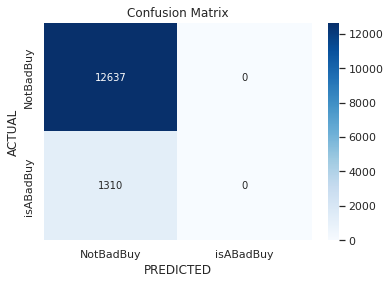


=======================================> PLOTS <=========================================


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


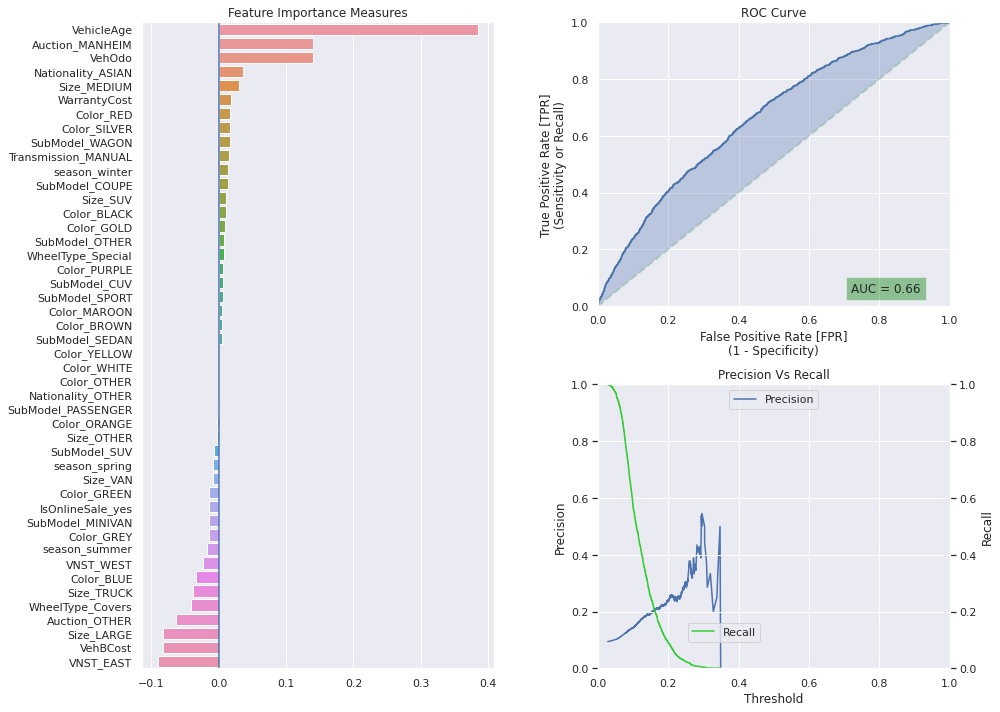

In [ ]:
from sklearn.linear_model import LogisticRegression

model_LR_num =LogisticRegression(penalty = 'l2', C = 0.001, solver = 'lbfgs', max_iter = 1000, random_state= 2022)

#model_LR_num_fit=model_LR_num.fit(X_train,y_train)
#y_pred=model_LR_num_fit.predict(X_val)



model_LR_num, model_LR_num_report = report(model_LR_num, X_train, y_train,
                                X_test, y_test,
                                display_scores=[primary_eval_metric],
                                importance_plot=True,
                                feature_labels=list(df.columns[1:]),
                                confusion_labels=confusion_lbs)

#compute_metrics(y_val, y_pred)
#results.loc['LR-best',:] = compute_metrics(y_val, y_pred)

DecisionTreeClassifier(min_samples_split=9, random_state=2022)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 44628 samples
 Test Size: 13947 samples
---------------------------------------------
Training Time: 0.833 seconds
 Testing Time: 0.016 seconds
---------------------------------------------
Train Accuracy:  0.9493143318096262
 Test Accuracy:  0.8466336846633684
---------------------------------------------
Train F1 Score:  0.6939935064935064
 Test F1 Score:  0.1150186181216384

---------------------------------------------
 Area Under ROC (test):  0.5299946177678899
---------------------------------------------
Model Memory Size: 544.56 kB

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score   support

   NotBadBuy       0.91      0.92      0.92     12637
   isABadBuy       0.13      0.11      0.12      1310

    accuracy                     

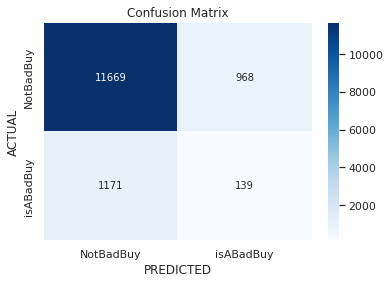


=======================================> PLOTS <=========================================


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


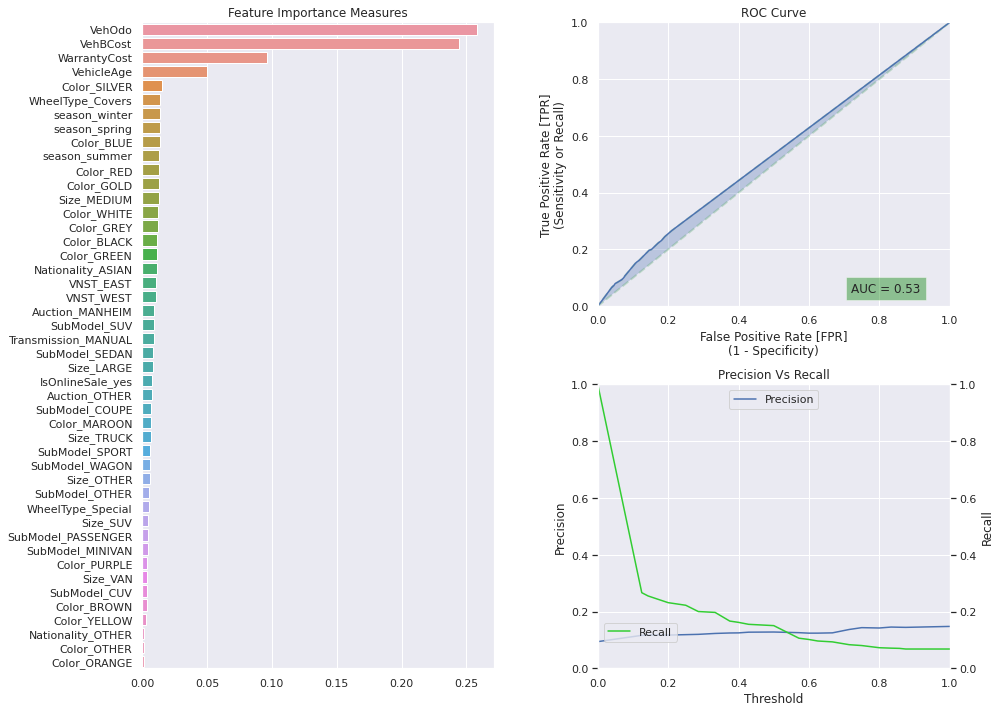

In [ ]:
model_DT_num =DecisionTreeClassifier(criterion = 'gini', max_depth=None, min_samples_split = 9, min_samples_leaf = 1, max_features = None, random_state= 2022)

#model_DT_num_fit=model_DT_num.fit(X_train,y_train)
#y_pred=model_DT_num_fit.predict(X_val)
#compute_metrics(y_val, y_pred)
#results.loc['DT-best',:] = compute_metrics(y_val, y_pred)

model_DT_num, model_DT_num_report = report(model_DT_num, X_train, y_train,
                                X_test, y_test,
                                display_scores=[primary_eval_metric],
                                importance_plot=True,
                                feature_labels=list(df.columns[1:]),
                                confusion_labels=confusion_lbs)


RandomForestClassifier(class_weight='balanced_subsample', max_features=None,
                       min_samples_leaf=9, min_samples_split=9,
                       n_estimators=500, random_state=2022)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 44628 samples
 Test Size: 13947 samples
---------------------------------------------
Training Time: 107.559 seconds
 Testing Time: 1.266 seconds
---------------------------------------------
Train Accuracy:  0.9665904813121807
 Test Accuracy:  0.8689323868932387
---------------------------------------------
Train F1 Score:  0.8404152841699668
 Test F1 Score:  0.16376944190301923

---------------------------------------------
 Area Under ROC (test):  0.6389830057984338
---------------------------------------------
Model Memory Size: 113871.32 kB

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score   support

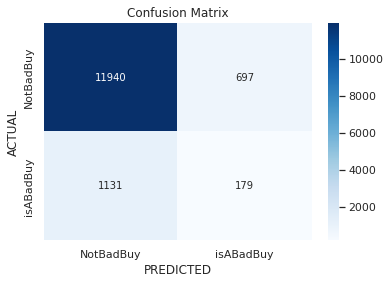


=======================================> PLOTS <=========================================


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


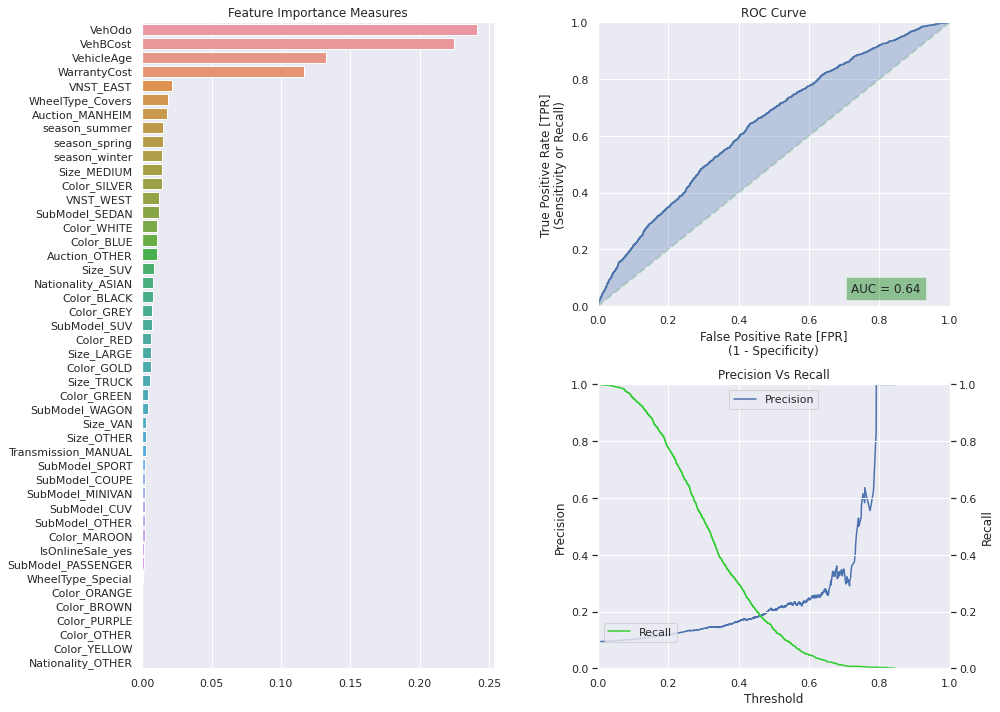

In [ ]:
model_RF_num =RandomForestClassifier(n_estimators = 500,criterion = 'gini', max_depth=None, min_samples_split = 9,  min_samples_leaf = 9, max_features = None, random_state= 2022, class_weight= 'balanced_subsample')

#model_RF_num_fit=model_RF_num.fit(X_train,y_train)
#y_pred=model_RF_num_fit.predict(X_val)
#compute_metrics(y_val, y_pred)
#results.loc['RF-best',:] = compute_metrics(y_val, y_pred)
#confusion(y_val, y_pred)

model_RF_num, model_RF_num_report = report(model_RF_num, X_train, y_train,
                                X_test, y_test,
                                display_scores=[primary_eval_metric],
                                importance_plot=True,
                                feature_labels=list(df.columns[1:]),
                                confusion_labels=confusion_lbs)

SVC(C=1, gamma=32, kernel='linear', probability=True, random_state=2022)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 44628 samples
 Test Size: 13947 samples
---------------------------------------------
Training Time: 191.534 seconds
 Testing Time: 7.104 seconds
---------------------------------------------
Train Accuracy:  0.9029308954019898
 Test Accuracy:  0.9060729906072991
---------------------------------------------
Train F1 Score:  0.0
 Test F1 Score:  0.0

---------------------------------------------
 Area Under ROC (test):  0.4447205497971243
---------------------------------------------
Model Memory Size: 4009.28 kB

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score   support

   NotBadBuy       0.91      1.00      0.95     12637
   isABadBuy       0.00      0.00      0.00      1310

    accuracy                           0.91     13

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

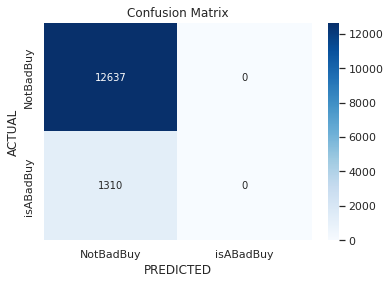


=======================================> PLOTS <=========================================


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


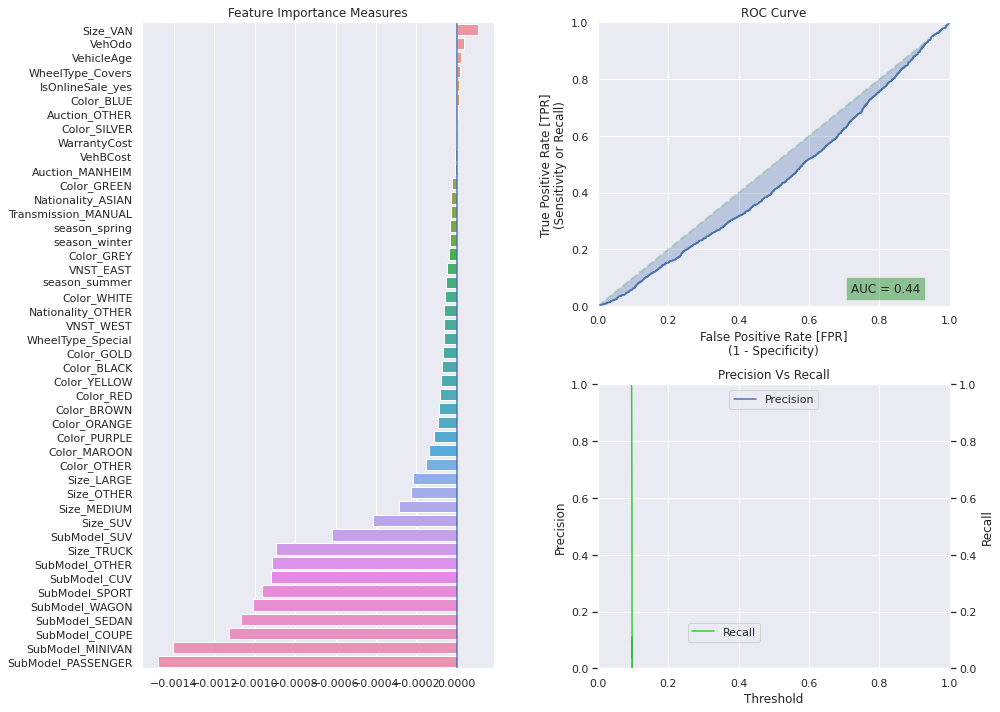

In [ ]:
from sklearn.svm import SVC
model_SVM_num=SVC(C=1, gamma= 32, kernel='linear', random_state=2022,probability=True)

model_SVM_num, model_SVM_num_report = report(model_SVM_num, X_train, y_train,
                                X_test, y_test,
                                display_scores=[primary_eval_metric],
                                importance_plot=True,
                                feature_labels=list(df.columns[1:]),
                                confusion_labels=confusion_lbs)

#model_SVM_num_fit=model_SVM_num.fit(X_train,y_train)
#y_pred=model_SVM_num_fit.predict(X_val)
#compute_metrics(y_val, y_pred)
#results.loc['SVM-best',:] = compute_metrics(y_val, y_pred)

In [ ]:
report_list = [model_DT_num_report,model_RF_num_report,model_LR_num_report,
               model_SVM_num_report]
clf_labels = [rep['clf'].__class__.__name__ for rep in report_list]
#clf_labels[-3] = 'Neural Nets'
#clf_labels[-2] = 'Linear SVC'
#clf_labels[-1] = 'RBF SVC'

In [ ]:
compare_table, compare_plot = compare_models(y_test, clf_reports=report_list,
                                             labels=clf_labels,
                                             score=primary_eval_metric.__name__)

compare_table.sort_values(by=['Overfitting', 'F1-score'], ascending=[True, False])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

,Train f1_score,Test f1_score,Overfitting,Accuracy,ROC Area,Precision,Recall,F1-score,Support
LogisticRegression,0.0,0.0,False,0.906073,0.66332,0.0,0.0,0.0,1310
SVC,0.0,0.0,False,0.906073,0.444721,0.0,0.0,0.0,1310
RandomForestClassifier,0.84,0.164,True,0.868932,0.638983,0.204338,0.136641,0.163769,1310
DecisionTreeClassifier,0.694,0.115,True,0.846634,0.529995,0.125565,0.106107,0.115019,1310


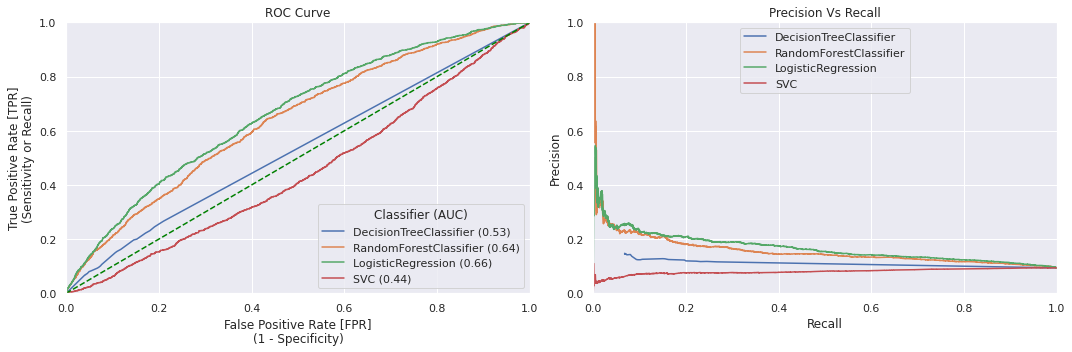

In [ ]:
compare_plot

In [25]:
import matplotlib.pyplot as plt

activities = ['Categorical', 'Numeric', 'Boolean (Target)']

slices = [14, 4, 1]

colors = ['#e41a1c', #377eb8, '#ff7f00']

plt.pie(slices, labels = activities, colors=colors, startangle=90, shadow = True, explode=(0, 0, 0), 
radius = 1.2, autopct = '%1.1f%%') 


plt.show()

SyntaxError: ignored